In [5]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/kir/KIR_development/bin/imports.ipynb")
execute_notebook("/cellar/users/ramarty/Projects/kir/KIR_development/data_gathering/alternate/sample_mapping.ipynb")

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


## Determine the usefulness of fourmers as a normalizer

###Questions: <br>
Are the fourmers of the whole genome different than that of just the KIR? <br>
Can some of just KIR be salvaged to normalize that represent the whole genome?

#### Whole genome

In [20]:
df_whole = pd.read_csv('/cellar/users/ramarty/Data/kir/components/alternate/components_four_counts.csv', index_col=0)

In [21]:
samples = population_dictionary_stripped[population_dictionary.keys()[0]]
df_whole = df_whole.ix[samples].dropna()
len(samples)

230

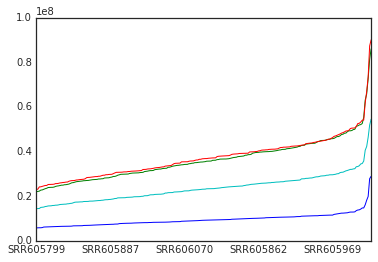

In [25]:
for mer in four_mers[:4]:
    df_whole[[mer]].sum(axis=1).sort_values().plot()

Are the k-mers internally consistent? Or are some way enriched? 

#### KIR

In [12]:
df_kir = pd.read_csv('/cellar/users/ramarty/Data/kir/components/alternate/components_four_kir_counts.csv', index_col=0)

In [23]:
samples = population_dictionary_stripped[population_dictionary.keys()[0]]
df_kir = df_kir.ix[samples].dropna()
len(samples)

230

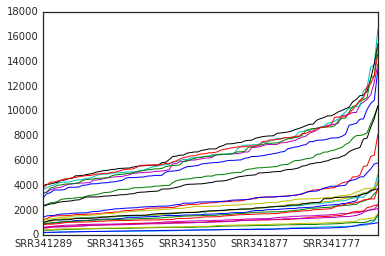

In [14]:
for mer in four_mers:
    df_kir[[mer]].sum(axis=1).sort_values().plot()

#### Plotted against each other

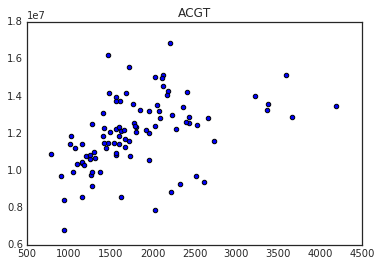

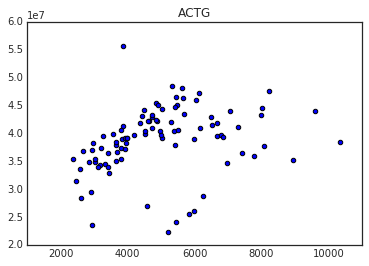

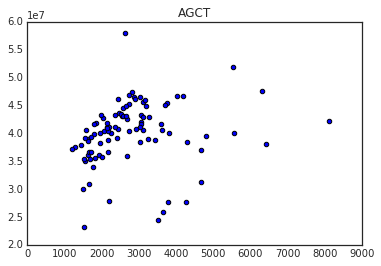

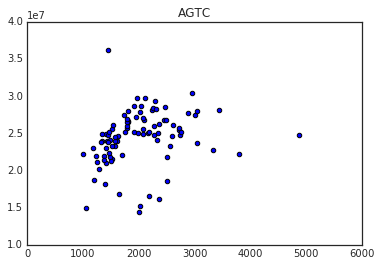

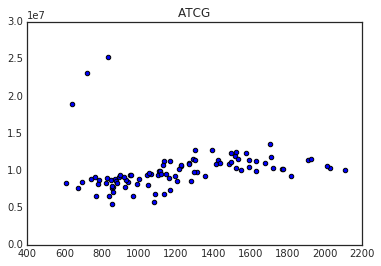

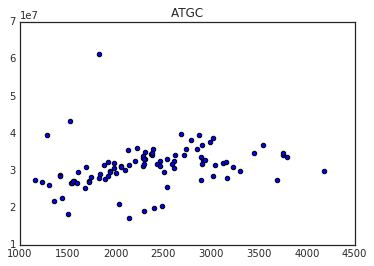

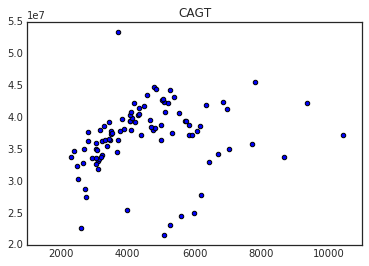

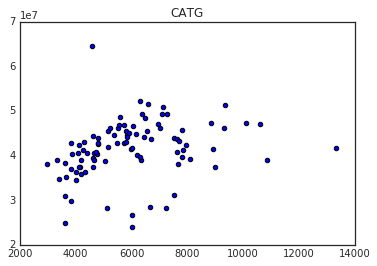

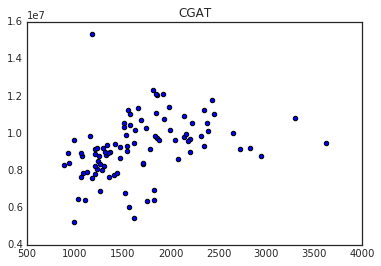

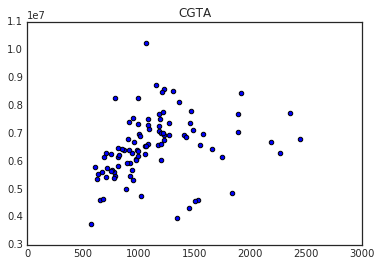

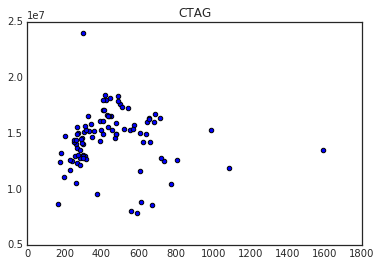

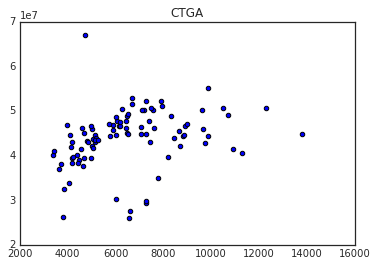

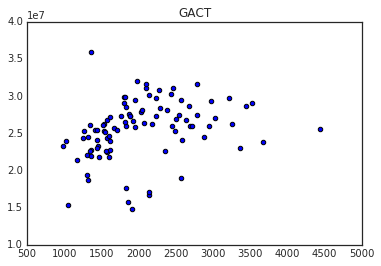

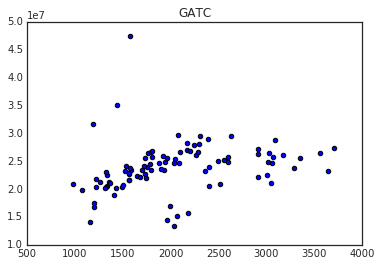

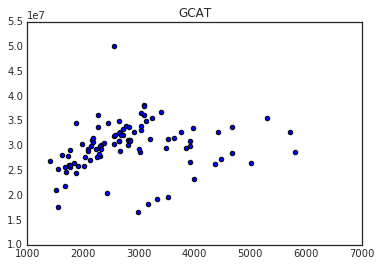

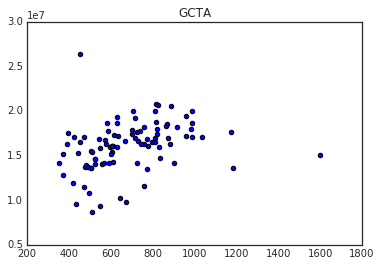

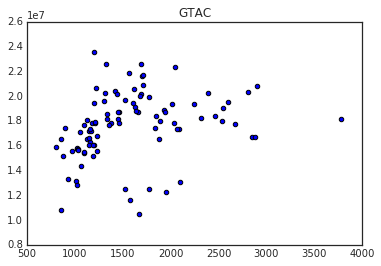

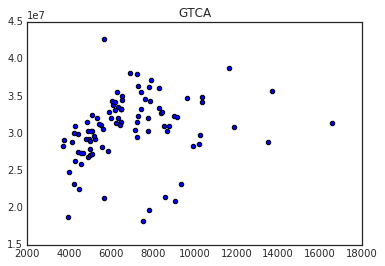

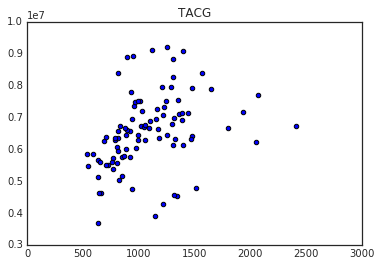

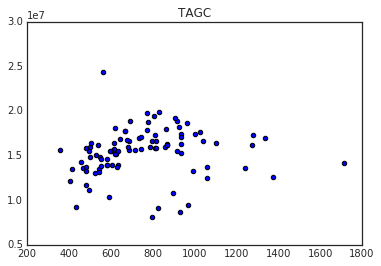

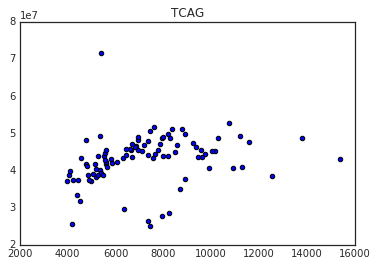

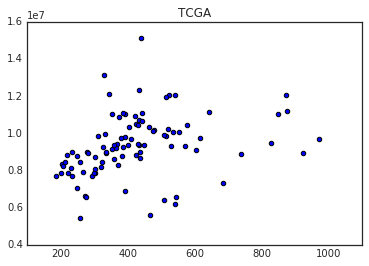

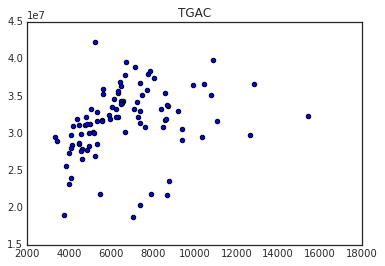

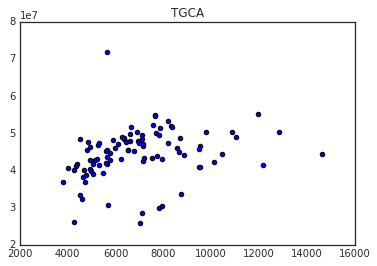

In [18]:
# Are some k-mers more consistent in their coverage across whole genome and kir region? 
for mer in four_mers:
    plt.scatter(df_kir[[mer]].sum(axis=1), df_whole[[mer]].sum(axis=1))
    plt.title(mer)
    plt.show()
    plt.clf()

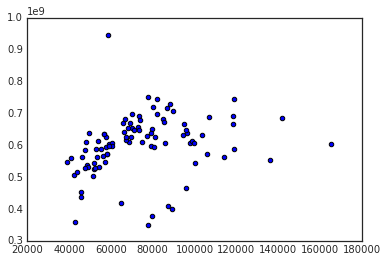

In [19]:
plt.scatter(df_kir[four_mers].sum(axis=1), df_whole[four_mers].sum(axis=1))